# Import Modules

In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Create Universal Set

In [ ]:
# Initialize Universal Set {Temp, WaterVolume, RiceAmount, Time, RiceQuality}
# Inputs
Temp = ctrl.Antecedent(np.arange(0, 101, 1), 'Temperature')
# WaterVolume = ctrl.Antecedent(np.arange(0, 1001, 10), 'WaterVolume')
RiceAmount = ctrl.Antecedent(np.arange(0, 1001, 10), 'RiceAmount')
Time = ctrl.Antecedent(np.arange(0, 61, 1), 'Time')
# Outputs
RiceQuality = ctrl.Consequent(np.arange(0, 11, 1), 'RiceQuality')

# Membership Functions

In [ ]:
# Membership Function
# 1. Temperature
Temp['low'] = fuzz.trimf(Temp.universe, [0, 0, 35])
Temp['medium'] = fuzz.trimf(Temp.universe, [15, 50, 85])
Temp['high'] = fuzz.trimf(Temp.universe, [65, 100, 100])
# 2. WaterVolume
# WaterVolume['low'] = fuzz.trapmf(WaterVolume.universe, [0, 0, 200, 400])
# WaterVolume['medium'] = fuzz.trapmf(WaterVolume.universe, [200, 400, 600, 800])
# WaterVolume['high'] = fuzz.trapmf(WaterVolume.universe, [600, 800, 1000, 1000])
# 3. RiceAmount
RiceAmount['low'] = fuzz.trapmf(RiceAmount.universe, [0, 0, 200, 400])
RiceAmount['medium'] = fuzz.trapmf(RiceAmount.universe, [200, 400, 600, 800])
RiceAmount['high'] = fuzz.trapmf(RiceAmount.universe, [600, 800, 1000, 1000])
# 4. Time
Time['short'] = fuzz.trimf(Time.universe, [0, 0, 20])
Time['medium'] = fuzz.trimf(Time.universe, [10, 30, 50])
Time['long'] = fuzz.trimf(Time.universe, [40, 60, 60])
# 5. RiceQuality
RiceQuality['undercooked'] = fuzz.trimf(RiceQuality.universe, [0, 0, 4])
RiceQuality['tendor'] = fuzz.trimf(RiceQuality.universe, [3, 5, 7])
RiceQuality['overcooked'] = fuzz.trimf(RiceQuality.universe, [6, 10, 10])

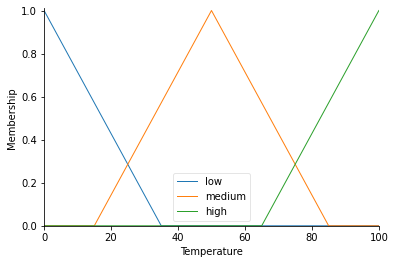

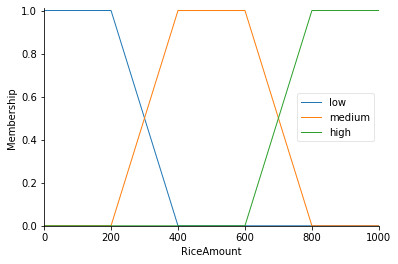

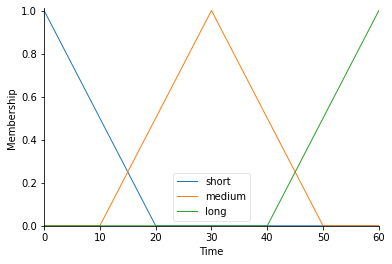

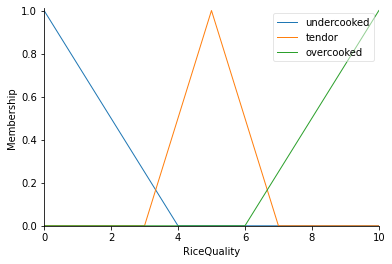

In [ ]:
# View Membership Function
Temp.view()
# WaterVolume.view()
RiceAmount.view()
Time.view()
RiceQuality.view()
plt.show()

# Fuzzy Rules

In [ ]:
rule1 = ctrl.Rule(antecedent=((RiceAmount['low'] & Temp['low'] & Time['short'])     |
                              (RiceAmount['medium'] & Temp['low'] & Time['short'])  |
                              (RiceAmount['medium'] & Temp['low'] & Time['medium']) |
                              (RiceAmount['high'] & Temp['low'] & Time['short'])    |
                              (RiceAmount['high'] & Temp['low'] & Time['medium'])   |
                              (RiceAmount['high'] & Temp['low'] & Time['long'])     |
                              (RiceAmount['low'] & Temp['low'] & Time['medium'])    ),
                  consequent=RiceQuality['undercooked'], label='undercooked')

rule2 = ctrl.Rule(antecedent=((RiceAmount['low'] & Temp['low'] & Time['long'])          |
                              (RiceAmount['low'] & Temp['medium'] & Time['short'])      |
                              (RiceAmount['low'] & Temp['medium'] & Time['medium'])     |
                              (RiceAmount['low'] & Temp['high'] & Time['short'])        |
                              (RiceAmount['medium'] & Temp['low'] & Time['long'])       |
                              (RiceAmount['medium'] & Temp['medium'] & Time['short'])   | 
                              (RiceAmount['medium'] & Temp['medium'] & Time['medium'])  |
                              (RiceAmount['medium'] & Temp['high'] & Time['short'])     |
                              (RiceAmount['high'] & Temp['medium'] & Time['short'])     |
                              (RiceAmount['high'] & Temp['medium'] & Time['medium'])    |
                              (RiceAmount['high'] & Temp['high'] & Time['short'])       ), 
                  consequent=RiceQuality['tendor'], label='tendor')

rule3 = ctrl.Rule(antecedent=((RiceAmount['low'] & Temp['medium'] & Time['long'])     |
                              (RiceAmount['low'] & Temp['high'] & Time['medium'])     |
                              (RiceAmount['low'] & Temp['high'] & Time['long'])       |
                              (RiceAmount['medium'] & Temp['medium'] & Time['long'])  |
                              (RiceAmount['medium'] & Temp['high'] & Time['medium'])  |
                              (RiceAmount['medium'] & Temp['high'] & Time['long'])    |
                              (RiceAmount['high'] & Temp['medium'] & Time['long'])    |
                              (RiceAmount['high'] & Temp['high'] & Time['medium'])    |
                              (RiceAmount['high'] & Temp['high'] & Time['long'])      ),
                  consequent=RiceQuality['overcooked'], label='overcooked')

In [ ]:
# Add all rules to control system
RiceQuality_prediction = ctrl.ControlSystem([rule1, rule2, rule3])
RiceQuality_probability = ctrl.ControlSystemSimulation(RiceQuality_prediction)

# Insert Inputs

In [ ]:
RiceQuality_probability.input['RiceAmount'] = 370
# RiceQuality_probability.input['WaterVolume']
RiceQuality_probability.input['Temperature'] = 80
RiceQuality_probability.input['Time'] = 45
RiceQuality_probability.compute()

# Results

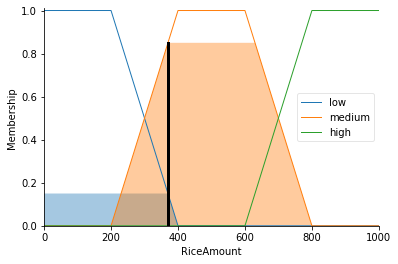

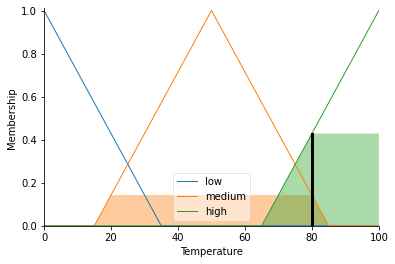

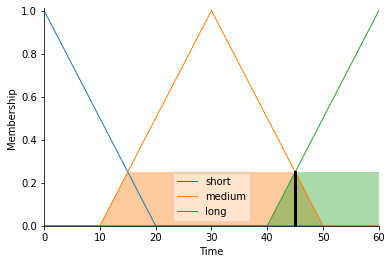

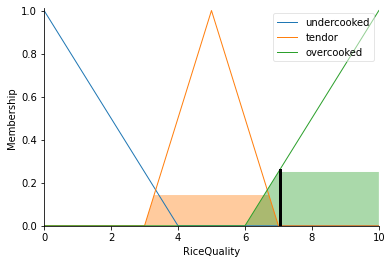

In [ ]:
RiceAmount.view(sim=RiceQuality_probability)
# WaterVolume.view(sim=RiceQuality_probability)
Temp.view(sim=RiceQuality_probability)
Time.view(sim=RiceQuality_probability)
RiceQuality.view(sim=RiceQuality_probability)
plt.show()

In [ ]:
print(RiceQuality_probability.output['RiceQuality'])

7.039515615041427
